In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ТЗ /LOOQME/Тестове Data Analyst - Статті.csv', parse_dates=['Дата виходу'])

In [2]:
df.head(5)

,Заголовок,Тип ЗМІ,Джерело,Регіон,Анотація,Текст,Медіахолдинг,Ключове слово,Роль,Подія,...,Лічильник переглядів на сайті,Аудиторія автора,Аудиторія місця публікації,Назва місця публікації,Посилання на місце публікації,Кількість лайків,Кількість репостів,Кількість коментарів,Сумарна кількість переглядів разом із дублями,Тип контенту
0,"Нова реальність, нові подарунки нашим захисник...",Соціальні мережі,facebook.com,Київ (Центральні),"Нова реальність, нові подарунки нашим захисник...","Нова реальність, нові подарунки нашим захисник...",NaN,Nestle,Головна,Ні,...,NaN,0,11241,"Це Вінниця, Друже !",https://www.facebook.com/1405502429691859,0.0,0.0,0.0,11241,Пост
1,Український зооринок: від стихійної торгівлі в...,Інтернет,NV.ua,Київ (Центральні),"Ставлення до домашніх улюбленців — показник, я...","Ставлення до домашніх улюбленців — показник, я...",NaN,Nestle,Епізодична,Ні,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,3597,NaN
2,Распознано автоматически: Исландия ТВ 2024-07-...,ТБ,Исландия ТВ,NaN,Данный текст был распознан из видео сюжета авт...,Данный текст был распознан из видео сюжета авт...,NaN,Nestle,Другорядна,Ні,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Распознано автоматически: Исландия ТВ 2024-07-...,ТБ,Исландия ТВ,NaN,Данный текст был распознан из видео сюжета авт...,Данный текст был распознан из видео сюжета авт...,NaN,Nestle,Другорядна,Ні,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,Самое сочное мороженое: топ-10 брендов фруктов...,Інтернет,crimea-news.com,Крим,В жаркие знойные дни многие из нас привыкли сп...,В жаркие знойные дни многие из нас привыкли...,NaN,Nestle,Епізодична,Ні,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,91,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 52 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Заголовок                                      246 non-null    object        
 1   Тип ЗМІ                                        246 non-null    object        
 2   Джерело                                        246 non-null    object        
 3   Регіон                                         235 non-null    object        
 4   Анотація                                       246 non-null    object        
 5   Текст                                          246 non-null    object        
 6   Медіахолдинг                                   5 non-null      object        
 7   Ключове слово                                  246 non-null    object        
 8   Роль                                           246 non-null 

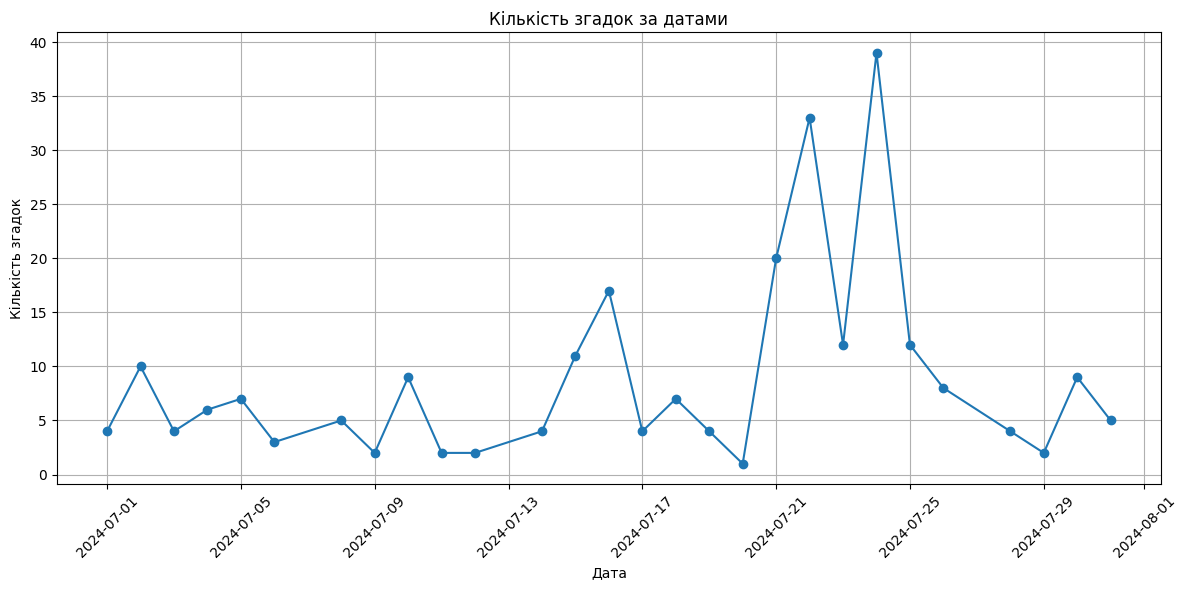

In [4]:
# Групуємо кількість згадок по датах
mentions_by_date = df.groupby('Дата виходу').size().reset_index(name='Кількість згадок')

# Сортуємо за датою
mentions_by_date = mentions_by_date.sort_values('Дата виходу')

# Візуалізація
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(mentions_by_date['Дата виходу'], mentions_by_date['Кількість згадок'], marker='o')
plt.title('Кількість згадок за датами')
plt.xlabel('Дата')
plt.ylabel('Кількість згадок')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

**Що видно на графіку:**

* **Стабільна активність:**

З 1 по 19 липня — згадок небагато (3–10 в день).

Це — базовий рівень.

* **Яскраві піки:**

2024-07-22 — ~33 згадки.

2024-07-24 — майже 40 згадок (максимум).

Обидва піки — індикатори важливих подій (інфопривод або аномалія).

При чому між ними є яскраве просідання 2024-07-23 - 17 згадок.

In [5]:
# Всі згадки 22 липня
df[df['Дата виходу'] == '2024-07-22'][['Заголовок', 'Тип ЗМІ', 'Тональність', 'Ключове слово', 'Подія']]

,Заголовок,Тип ЗМІ,Тональність,Ключове слово,Подія
117,3 мільярди доларів заробила компанія Nestle вп...,Соціальні мережі,Негатив,Nestle,Ні
119,Вода из фекалий Nestlе фильтровала загрязнен...,Соціальні мережі,Негатив,Nestle,Ні
120,Скандал із бутильованою водою Nestlé: Médiapar...,Інтернет,Негатив,Nestle,Ні
121,Вибухнув скандал з бутильованою водою шахрайс...,Інтернет,Негатив,Nestle,Ні
122,HR Wisdom Summit: головні інсайти українського...,Інтернет,Позитив,Nestle,Ні
123,Нестле понад 15 років бере воду з фекальних дж...,Інтернет,Негатив,Nestle,Ні
124,Nestle фільтрувала і продавала забруднену воду...,Інтернет,Негатив,Nestle,Ні
125,Французские журналисты обвинили Nestle в прода...,Інтернет,Негатив,Nestle,Ні
126,Расследователи независимой французской газеты ...,Соціальні мережі,Негатив,Nestle,Ні
127,"Нестле давно відома своєю репутацією, як Джонс...",Соціальні мережі,Негатив,Nestle,Ні


In [6]:
# 22 липня
subset = df[df['Дата виходу'] == '2024-07-22']

# Кількість згадок за типом ЗМІ
print("Тип ЗМІ:")
print(subset['Тип ЗМІ'].value_counts())
print()  # ⬅️ додає пустий рядок

# Кількість згадок за тональністю
print("Тональність:")
print(subset['Тональність'].value_counts())
print()  # ⬅️ ще один пустий рядок

# Кількість згадок за подією
print("Подія:")
print(subset['Подія'].value_counts())

Тип ЗМІ:
Тип ЗМІ
Інтернет            17
Соціальні мережі    16
Name: count, dtype: int64

Тональність:
Тональність
Негатив    26
Позитив     4
Нейтрал     3
Name: count, dtype: int64

Подія:
Подія
Ні    33
Name: count, dtype: int64


**Що бачимо з аналітичного висновку (22 липня):**

Дата: 22 липня 2024

Бренд: Nestle

Контекст: Спостерігається різке зростання кількості згадок у медіа.

**Інтенсивність згадок:**

Загальна кількість згадок: 33, що значно перевищує середньоденний рівень (3–10).

Це свідчить про потужний інфопривід або інформаційну хвилю.

**Тональність:**
* Негативна: 26 згадок (~79%)

* Позитивна: 4

* Нейтральна: 3

**Висновок:** сплеск мав яскраво негативне забарвлення, що може вказувати на кризову ситуацію або інформаційну атаку.

**Типи джерел:**
* Інтернет-ЗМІ: 17

* Соціальні мережі: 16

Поширення велося приблизно однаково через соцмережі та онлайн-медіа, що може вказувати на скоординовану кампанію (ІПСО/інфоатака).

In [7]:
# 24 липня
df[df['Дата виходу'] == '2024-07-24'][['Заголовок', 'Тип ЗМІ', 'Тональність', 'Ключове слово', 'Подія']]

,Заголовок,Тип ЗМІ,Тональність,Ключове слово,Подія
158,"24 липня яке сьогодні свято, прикмети і тради...",Інтернет,Нейтрал,Nestle,Ні
160,Новини,Інтернет,Негатив,Nestle,Ні
161,"24 июля: Международный день заботы о себе, Ден...",Інтернет,Позитив,Nestle,Ні
162,"24 липня: Міжнародний день турботи про себе, Д...",Інтернет,Нейтрал,Nestle,Ні
163,"Сегодня лучше ""следить за языком"": какой празд...",Інформаційне агентство,Позитив,Nestle,Ні
164,"Сьогодні краще ""стежити за язиком"": яке свято ...",Інтернет,Позитив,Nestle,Ні
165,День розчинної кави: історія виникнення та чим...,Інтернет,Позитив,Nestle,Ні
166,Яке свято 24 липня та хто відзначає сьогодні і...,Інтернет,Позитив,Nestle,Ні
167,24 липня День фінансового працівника в Україні,Інтернет,Позитив,Nestle,Ні
168,"24 июля: какой сегодня праздник, приметы и зап...",Інтернет,Позитив,Nestle,Ні


In [8]:
# 24 липня
subset = df[df['Дата виходу'] == '2024-07-24']

# Кількість згадок за типом ЗМІ
print("Тип ЗМІ:")
print(subset['Тип ЗМІ'].value_counts())
print()  # ⬅️ додає пустий рядок

# Кількість згадок за тональністю
print("Тональність:")
print(subset['Тональність'].value_counts())
print()  # ⬅️ ще один пустий рядок

# Кількість згадок за подією
print("Подія:")
print(subset['Подія'].value_counts())

Тип ЗМІ:
Тип ЗМІ
Інтернет                  32
Преса                      3
Інформаційне агентство     2
Соціальні мережі           2
Name: count, dtype: int64

Тональність:
Тональність
Позитив    31
Нейтрал     5
Негатив     3
Name: count, dtype: int64

Подія:
Подія
Ні    39
Name: count, dtype: int64


**Що бачимо з аналітичного висновку (24 липня):**

Дата: 24 липня 2024  
Бренд: Nestle  
Контекст: Відзначається повторний сплеск згадок бренду в медіа, після пікового негативу 22 липня.

**Інтенсивність згадок:**

Загальна кількість згадок: **39**, що є найбільшим показником за весь період моніторингу.  
Це свідчить про важливий інфопривід або реакцію на попередній пік.


**Тональність:**
- Позитивна: 31 згадка
- Нейтральна: 5 згадок
- Негативна: 3 згадки

**Висновок:** Переважно позитивна інформаційна хвиля, можливо — відповідь бренду на попередню негативну ситуацію або незалежний позитивний інфопривід.


**Типи джерел:**
- Інтернет-ЗМІ: 32
- Преса: 3
- Інформаційне агентство: 2
- Соціальні мережі: 2

**Висновок:** Основна вага припадає на традиційні онлайн-джерела. Низька активність соцмереж **нехарактерна для організованих атак**, натомість свідчить про більш контрольоване поширення (офіційні новини, PR).


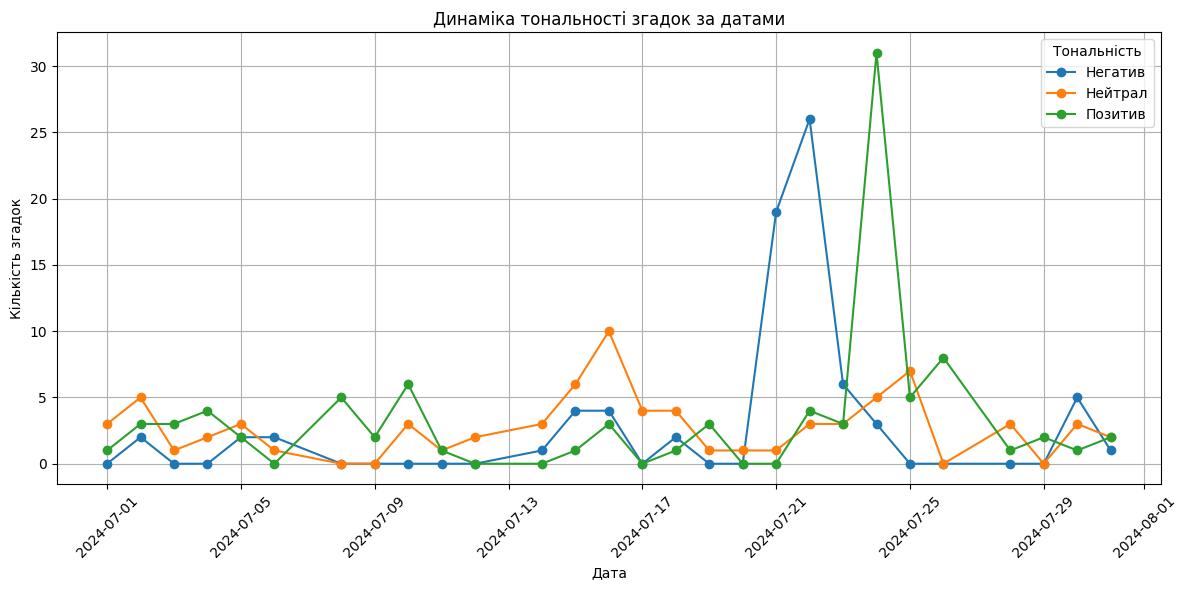

In [10]:
tone_by_date = df.groupby(['Дата виходу', 'Тональність']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
for column in tone_by_date.columns:
    plt.plot(tone_by_date.index, tone_by_date[column], marker='o', label=column)

plt.title('Динаміка тональності згадок за датами')
plt.xlabel('Дата')
plt.ylabel('Кількість згадок')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Тональність')
plt.tight_layout()
plt.show();

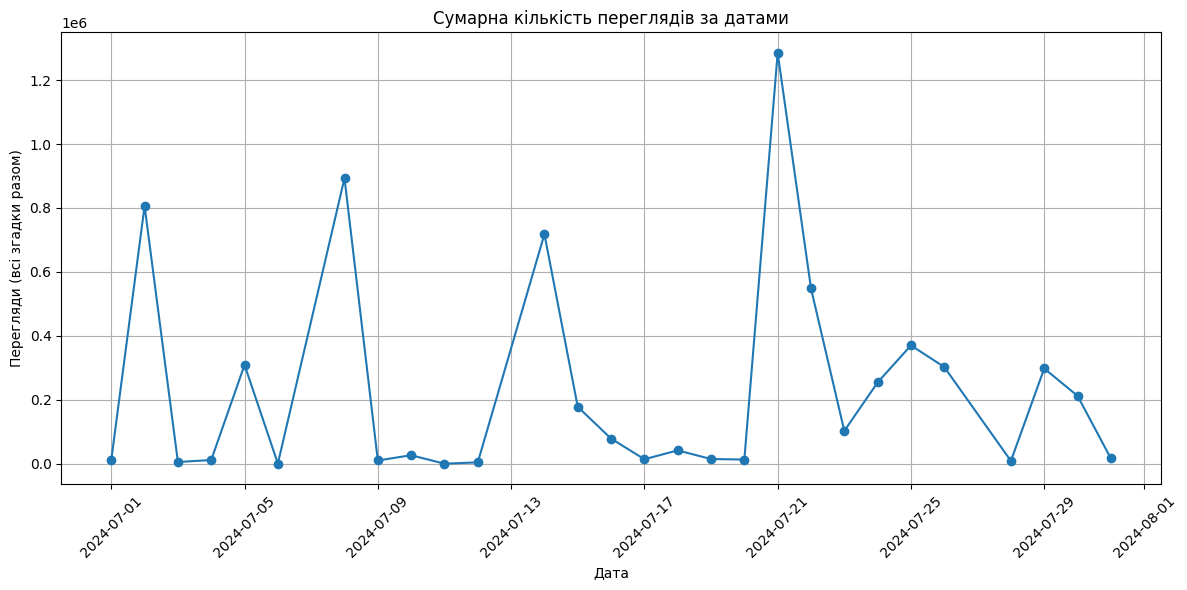

In [11]:
# Сумарна кількість переглядів по днях
views_by_date = df.groupby('Дата виходу')['Сумарна кількість переглядів разом із дублями'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(views_by_date['Дата виходу'], views_by_date['Сумарна кількість переглядів разом із дублями'], marker='o')
plt.title('Сумарна кількість переглядів за датами')
plt.xlabel('Дата')
plt.ylabel('Перегляди (всі згадки разом)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

**Що ми бачимо:**

* 22 липня — пік кількості згадок (~33), але переглядів майже немає.

* 24 липня — другий пік згадок (~39), але теж не є пік охоплення.

* Справжній пік охоплення — 21 липня (~1.3 млн переглядів), але кількість згадок у той день значно нижча (20).

* Є дні (до 10) згадками, які мають величезне охоплення (>800 тис).